# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed


In [15]:

#medical = pd.read_csv('data/insurance2.csv')

import os
print(os.getcwd())

medical = pd.read_csv('/Users/cicisofia/Downloads/insurance2.csv')

/Users/cicisofia


In [17]:
medical.shape

(1338, 8)

In [19]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and standard deviation are not the most appropriate statistics for this data because the distribution of charges is heavily right-skewed. Most patients have lower charges, but a few have extremely high ones that pull the mean upward and inflate the standard deviation. This makes both values poor representations of the typical patient. In this case, the median and interquartile range would better reflect the central tendency and spread.

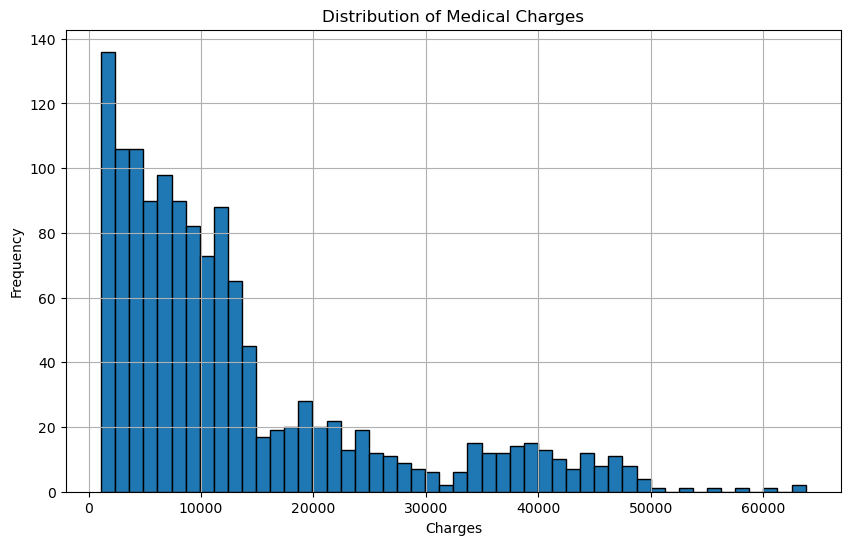

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=50, edgecolor='black')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [23]:
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

print(f"Mean: ${mean_charges:,.2f}")
print(f"Standard Deviation: ${std_charges:,.2f}")


Mean: $13,270.42
Standard Deviation: $12,110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I can justify using these data to answer the question because we are told to assume that they represent a random sample from the hospital’s population of charges. This assumption is critical — it allows us to use the Central Limit Theorem (CLT) to make inferences about the population mean. According to the CLT, the sampling distribution of the sample mean will be approximately normal even if the underlying data are skewed, as long as the sample size is large. In this case, with n = 1338, the sample is large enough for the CLT to apply.

The most appropriate frequentist test here is a one-sample t-test. We’re testing whether the true mean charge is less than $12,000, based on our sample. Since we don’t know the population standard deviation, the t-test is more appropriate than the z-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided confidence interval is appropriate in this case.

The administrator is specifically concerned that the average charge has fallen below $12,000, not whether it is different in either direction. This makes it a directional concern, which calls for a one-sided test and a one-sided confidence interval. A two-sided interval would test for deviations in both directions (above or below), which isn’t aligned with the nature of the concern.

In [31]:

n = len(medical)
sample_mean = medical['charges'].mean()
sample_std = medical['charges'].std(ddof=1)
se = sample_std / np.sqrt(n)

alpha = 0.05
df = n - 1
t_critical = t.ppf(1 - alpha, df)

lower_bound = sample_mean - t_critical * se

print(f"Sample mean: ${sample_mean:.2f}")
print(f"Lower bound of 95% one-sided confidence interval: ${lower_bound:.2f}")

if lower_bound > 12000:
    print("The administrator should not be concerned. We are 95% confident the true average charge is above $12,000.")
else:
    print("The administrator may need to be concerned. The 95% confidence interval includes values below $12,000.")


Sample mean: $13270.42
Lower bound of 95% one-sided confidence interval: $12725.49
The administrator should not be concerned. We are 95% confident the true average charge is above $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ In this case, the null hypothesis is that there is no difference in the mean charges between patients with insurance and those without, meaning the difference in their means is zero. The alternative hypothesis is that there is a difference in the mean charges, implying the difference is not zero. To test this, we use a two-sample t-test for the difference between means, assuming equal variances between the two groups. This assumption allows us to pool the variances of the insured and uninsured groups to calculate the standard error and t-statistic. If the variances were unequal, we would need to use a different version of the t-test (Welch’s), but for this test we assume they are similar enough to justify pooling.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [56]:

# Split data into insured and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Sample sizes
n1 = len(insured)
n2 = len(uninsured)

# Means
mean1 = insured.mean()
mean2 = uninsured.mean()

# Standard deviations
std1 = insured.std(ddof=1)
std2 = uninsured.std(ddof=1)

# Pooled standard deviation
pooled_var = (((n1 - 1) * std1**2) + ((n2 - 1) * std2**2)) / (n1 + n2 - 2)
pooled_std = np.sqrt(pooled_var)

# Standard error of the difference
se_diff = pooled_std * np.sqrt(1/n1 + 1/n2)

# t-statistic
t_stat = (mean1 - mean2) / se_diff

# Degrees of freedom
df = n1 + n2 - 2

# Two-tailed p-value
p_val_manual = 2 * (1 - t.cdf(abs(t_stat), df))

# Output manual results
print(f"Manual t-statistic: {t_stat:.4f}")
print(f"Manual p-value: {p_val_manual:.4f}")

# Now do the same test with scipy
t_stat_scipy, p_val_scipy = ttest_ind(insured, uninsured, equal_var=True)
print(f"scipy t-statistic: {t_stat_scipy:.4f}")
print(f"scipy p-value: {p_val_scipy:.4f}")



Manual t-statistic: 11.8933
Manual p-value: 0.0000
scipy t-statistic: 11.8933
scipy p-value: 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no built-in z-test function for sample means in scipy.stats because the z-test requires knowing the population standard deviation, which is almost never available in real-world data. Instead, we usually estimate the standard deviation from the sample, which is why the t-test is used. The t-test accounts for this uncertainty and is more appropriate in practice, so SciPy focuses on providing that.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test